### Query 2.1
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.
Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock
This would be helpful if we are to train our model to take NLP inputs.

In [13]:
import pandas as pd
from datetime import datetime
from functools import partial
import os
os.chdir('D:\downloads')
data = pd.read_csv("week2.csv")#loading week2.csv file
del data['Unnamed: 0']
duplicate_data = data 
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month,year,Day_Perc_Change,Trend
0,MINDTREE,EQ,2017-05-15,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,5,2017,0.000000,Slight or No Change
1,MINDTREE,EQ,2017-05-16,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,5,2017,0.363137,Slight or No Change
2,MINDTREE,EQ,2017-05-17,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,5,2017,-0.968120,Slight Negative
3,MINDTREE,EQ,2017-05-18,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,5,2017,-2.656265,Negative
4,MINDTREE,EQ,2017-05-19,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,5,2017,0.933252,Slight positive


In [14]:
data.Date.dtype

dtype('O')

In [15]:
data['Date'] = pd.to_datetime(data['Date'])
data.Date.dtype

dtype('<M8[ns]')

In [16]:
data.set_index('Date', inplace = True)
data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month,year,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,
2017-05-15,MINDTREE,EQ,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,5,2017,0.000000,Slight or No Change
2017-05-16,MINDTREE,EQ,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,5,2017,0.363137,Slight or No Change
2017-05-17,MINDTREE,EQ,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,5,2017,-0.968120,Slight Negative
2017-05-18,MINDTREE,EQ,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,5,2017,-2.656265,Negative
2017-05-19,MINDTREE,EQ,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,5,2017,0.933252,Slight positive
2017-05-22,MINDTREE,EQ,497.50,499.95,511.85,497.10,501.55,502.35,504.78,399974,2.018999e+08,9779,107089,26.77,5,2017,0.974874,Slight positive
2017-05-23,MINDTREE,EQ,502.35,504.00,507.45,491.00,498.00,501.15,498.72,452893,2.258664e+08,8567,198703,43.87,5,2017,-0.238877,Slight or No Change
2017-05-24,MINDTREE,EQ,501.15,502.00,515.00,494.05,511.95,509.95,506.72,823967,4.175211e+08,15083,351179,42.62,5,2017,1.755961,Positive
2017-05-25,MINDTREE,EQ,509.95,513.70,549.50,508.45,542.50,543.90,532.14,1632427,8.686829e+08,25072,693340,42.47,5,2017,6.657515,Among top gainers


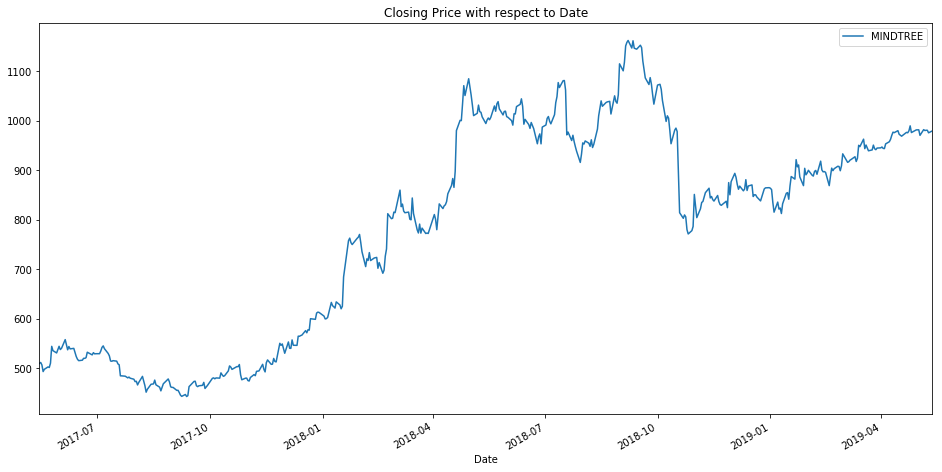

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
data['Close Price'].plot(label = 'MINDTREE',figsize=(16,8),title='Closing Price with respect to Date')
plt.legend()

In [18]:
data['Close Price'].diff().abs().sort_values(ascending = False)
#stored this data in a csv file and analyzed each cell and found that only top 5 closing price differences are significant and hence can be considered as drastic change days
#These close price 
#Date
# 2018-10-19    164.05
# 2018-07-19     90.65
# 2018-04-20     82.25
# 2018-02-23     71.20
# 2018-10-31     64.70
# we will fetch news articles for these 5 days only
# news for 2018-10-31 not available
# news for 2018-10-19, 2018-07-19,2018-02-23 and 2018-04-20 are only available

Date
2018-10-19    164.05
2018-07-19     90.65
2018-04-20     82.25
2018-02-23     71.20
2018-10-31     64.70
2018-08-31     62.65
2018-01-18     59.30
2018-01-22     54.95
2018-11-28     50.65
2018-03-05     45.50
2018-03-15     44.10
2018-10-08     42.30
2019-01-22     39.35
2018-10-01     38.55
2018-04-02     38.25
2017-11-27     37.60
2018-04-26     36.90
2018-08-27     36.75
2018-06-14     36.00
2019-01-29     35.00
2018-09-21     34.15
2017-05-25     33.95
2018-06-29     33.90
2018-04-30     33.90
2018-04-25     33.75
2018-03-06     33.45
2018-09-05     32.95
2018-03-19     32.95
2018-05-02     32.95
2018-04-19     32.50
               ...  
2018-05-30      0.60
2019-05-08      0.55
2017-07-13      0.55
2017-09-19      0.50
2017-11-10      0.50
2019-02-14      0.50
2019-02-26      0.50
2019-04-01      0.45
2017-10-09      0.40
2017-11-09      0.40
2017-11-21      0.40
2018-12-31      0.40
2018-06-07      0.40
2018-07-17      0.35
2019-04-04      0.30
2017-06-30      0.30
2017-12-

In [19]:
import bs4
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests 
# more than 1 news is available for a single date so using different related variables
url_2018_10_19 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1103-cholamandalam-securities-3064341.html'
r = requests.get(url_2018_10_19) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("Printing news for only 4 dates since the 5th date has no news")
print("Obtaining news from Money Control")
print("News for 2018-10-19")
print("Only 1 news is available on this date")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")

url_2018_07_19 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1115-hdfc-securities-2734761.html'
r = requests.get(url_2018_07_19) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_07_19")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")

url_2018_04_20 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1000-reliance-securities-2553515.html'
r = requests.get(url_2018_04_20) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_04_20")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")

url_2018_02_23 = 'https://www.moneycontrol.com/news/business/buy-mindtree-pidilite-industries-sell-upl-tata-steel-tata-motors-sudarshan-sukhani-2513371.html'
r = requests.get(url_2018_02_23) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_02_23")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")


Printing news for only 4 dates since the 5th date has no news
Obtaining news from Money Control
News for 2018-10-19
Only 1 news is available on this date


Title:
Buy Mindtree; target of Rs 1103: Cholamandalam Securities


Subject:
Cholamandalam Securities is bullish on Mindtree has recommended buy rating on the stock with a target price of Rs 1103 in its research report dated October 19, 2018.


Report:
In 2QFY19, Mindtree’s revenue grew by 7.1% QoQ to INR 17.5bn in line with our expectations of INR 17.6bn largely driven by volume (+6.3% QoQ) and INR depreciation. In USD terms, revenues grew by 2% QoQ. In constant currency terms, revenue grew by 2.4% QoQ. Revenue from Digital business grew by 3.3% QoQ contributing 48.1% to total revenues. EBITDA grew by 16.8% QoQ to INR 2.7bn in-line with our expectations. EBITDA margin expanded by 130bps QoQ to 15.4%. EBITDA margin expanded on account of rupee depreciation (+130 bps) and presence of one off cost in the base quarter (+60bps) which was

### Query 2.2
A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

<StemContainer object of 3 artists>

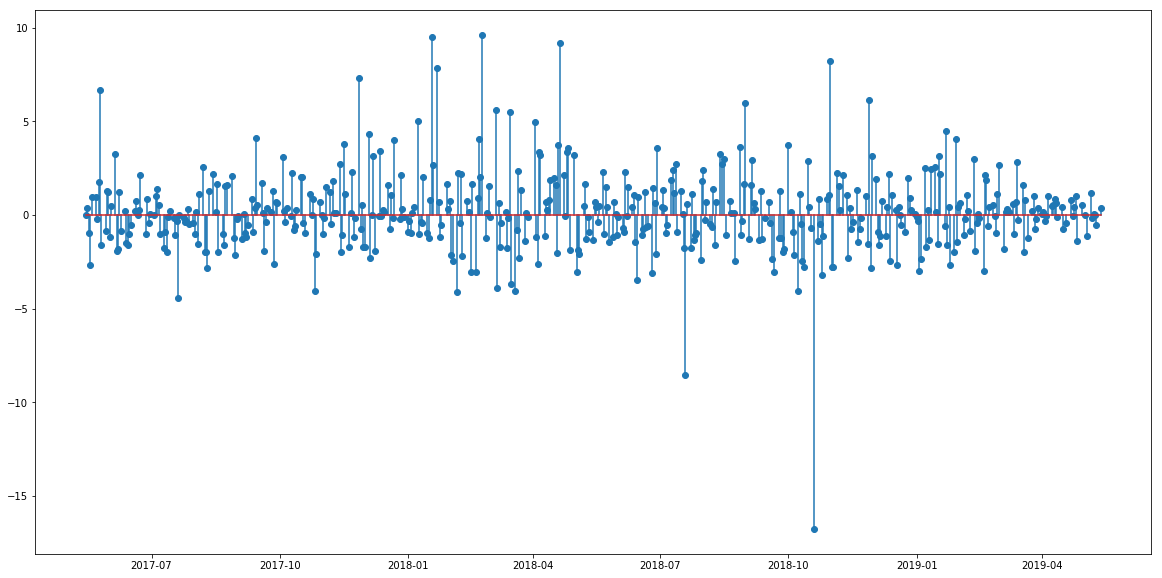

In [24]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
plt.stem(data.index,data['Day_Perc_Change'])

# Query 2.3 
Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 

<StemContainer object of 3 artists>

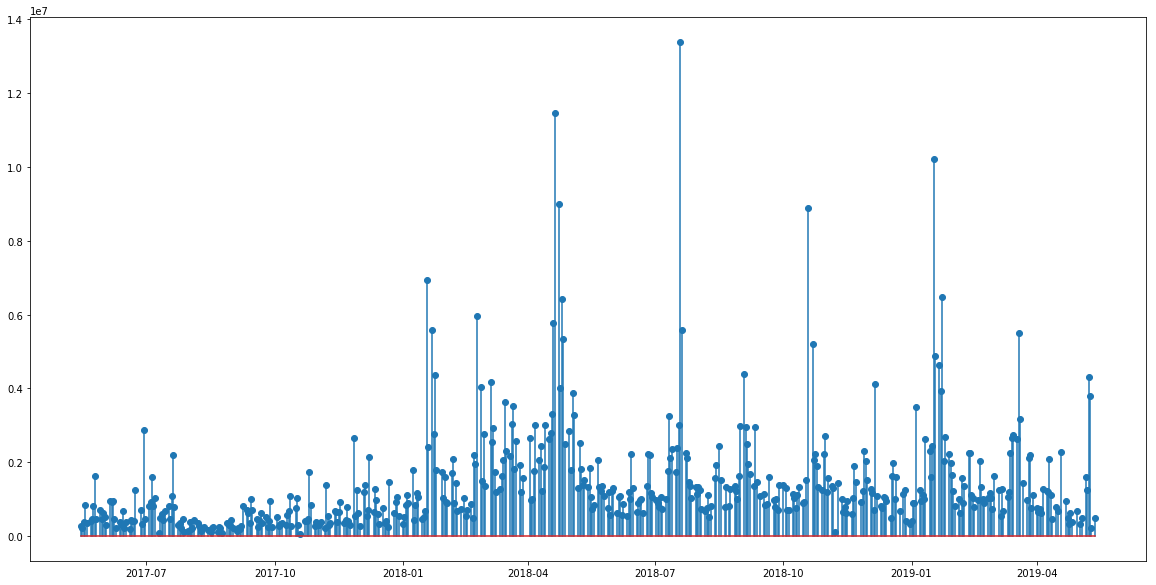

In [25]:
plt.figure(figsize=(20,10))
plt.stem(data.index,data['Total Traded Quantity'])

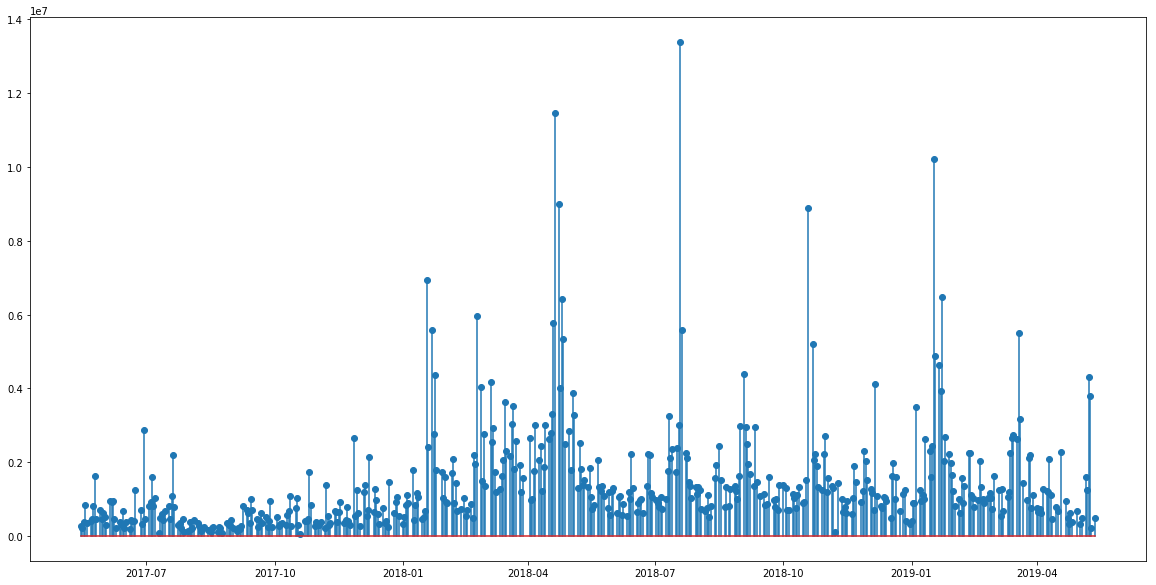

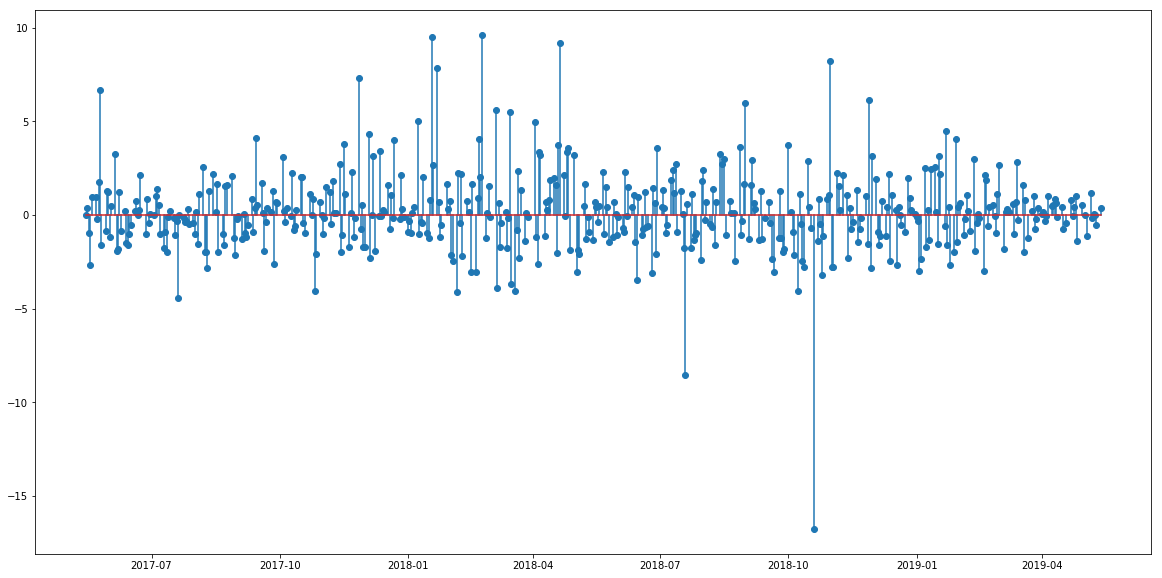

In [26]:
plt.figure(figsize=(20,10))
plt.stem(data.index,data['Total Traded Quantity'])
plt.show()
plt.figure(figsize=(20,10))
plt.stem(data.index,data['Day_Perc_Change'])
plt.show()


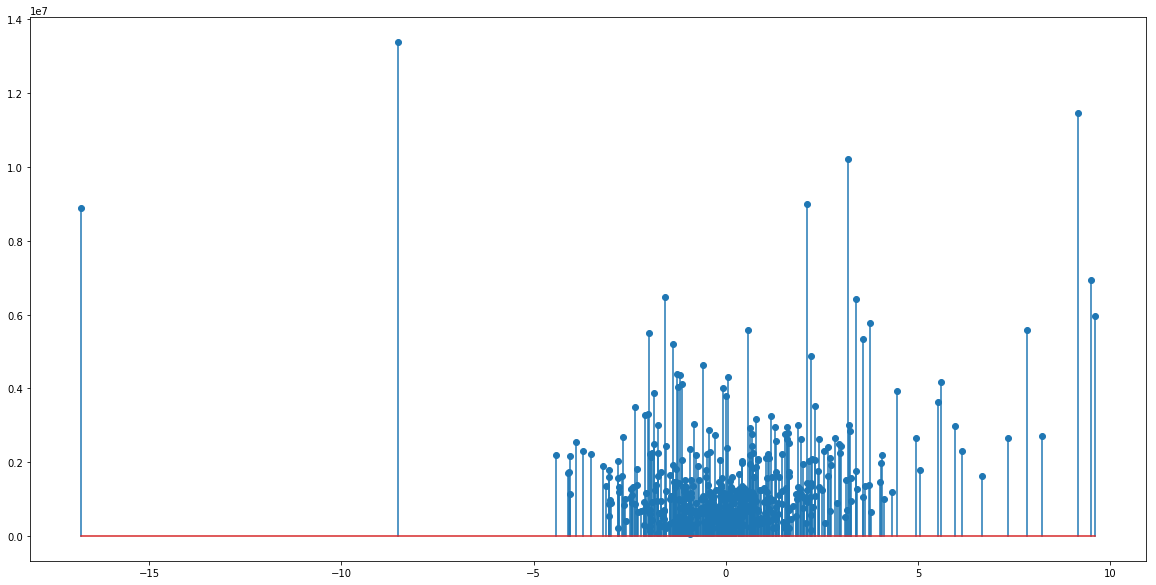

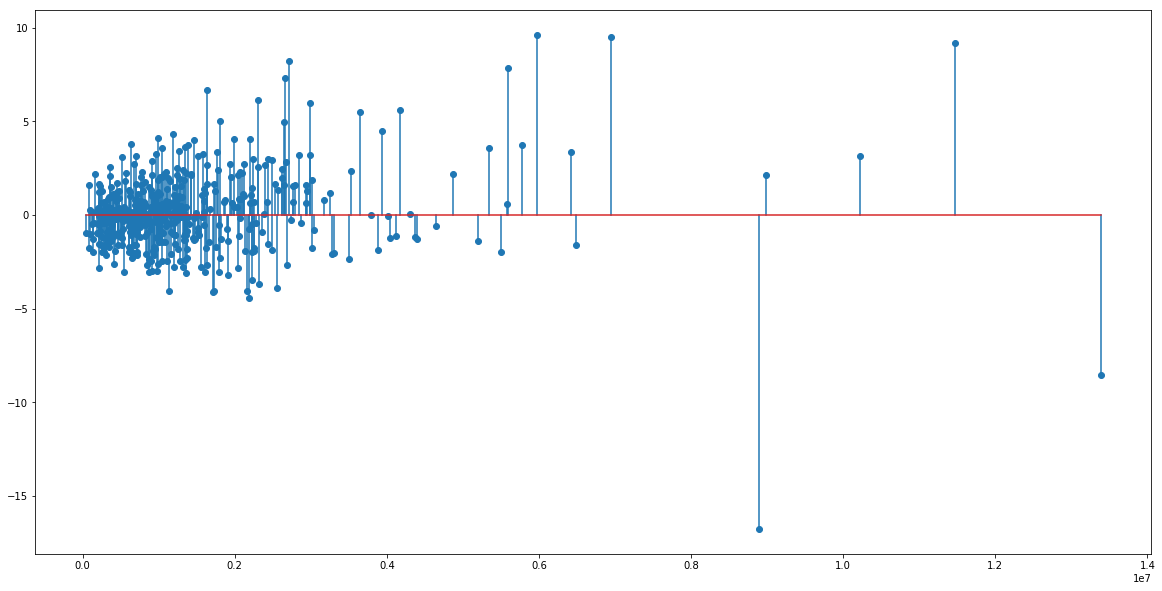

In [27]:
plt.figure(figsize=(20,10))
plt.stem(data['Day_Perc_Change'],data['Total Traded Quantity'])
plt.show()
plt.figure(figsize=(20,10))
plt.stem(data['Total Traded Quantity'],data['Day_Perc_Change'])
plt.show()

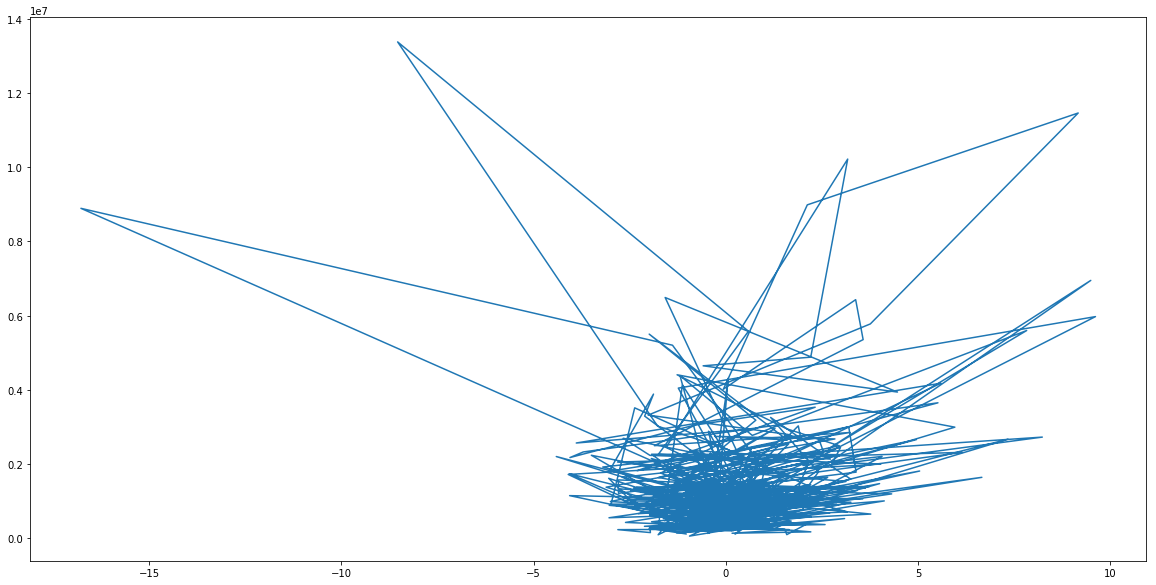

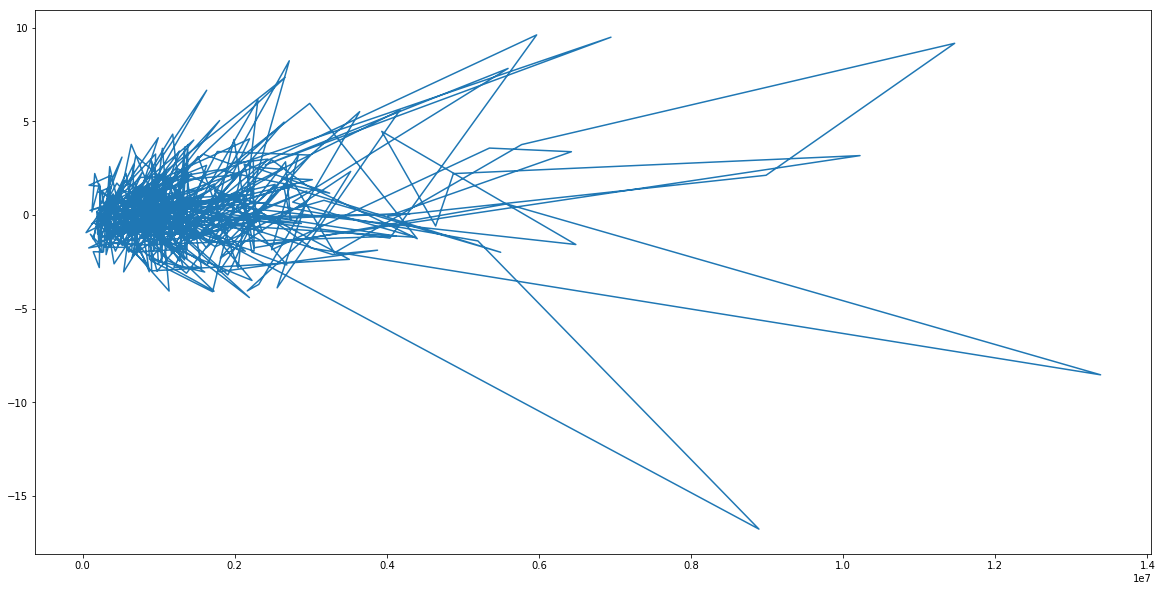

In [28]:
plt.figure(figsize=(20,10))
plt.plot(data['Day_Perc_Change'],data['Total Traded Quantity'])
plt.show()
plt.figure(figsize=(20,10))
plt.plot(data['Total Traded Quantity'],data['Day_Perc_Change'])
plt.show()

In [ ]:
# Documentation:-
# Analysis: The positive hills of Day_Perc_Change vs Date plot matches slightly with the Total Traded Quantity vs Date plot.
# Inference: It implies that whenever the positive daily percentages increases our total traded quantity also rises by somewhat the same amount.
# And since the daily changing percentage depends upon the closing prices of each day hence closing prices play a major in the increase of the total traded quantity

# Query 2.4 
We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

In [29]:
import matplotlib.pyplot as plt
from collections import Counter

Trendsare = ['Postive','Negative','Breakout Bull','Breakout Bear','Among top losers','Among top gainers','Slight or No Change','Slight Positive','Slight Negative']
Trend_to_list = data['Trend'].tolist()
counts = Counter(Trend_to_list)
counts

Counter({'Slight or No Change': 142,
         'Slight Negative': 43,
         'Negative': 114,
         'Slight positive': 45,
         'Positive': 97,
         'Among top gainers': 30,
         'Among top losers': 15,
         'Bull run': 6,
         'Bear drop': 2})

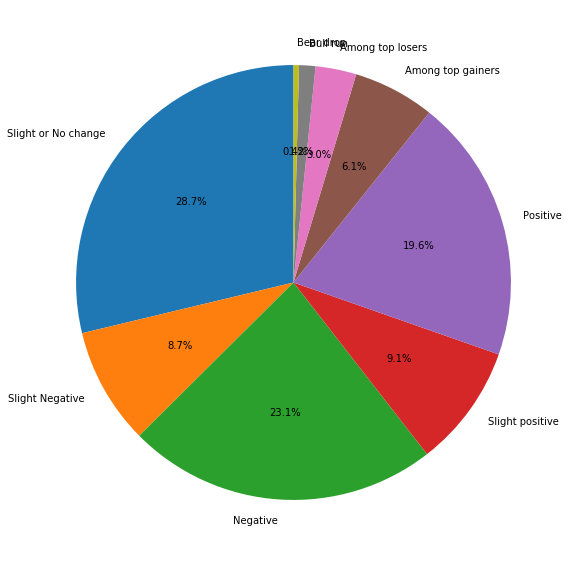

In [35]:
counter = [142,43,114,45,97,30,15,6,2]
labels= ['Slight or No change','Slight Negative','Negative','Slight positive','Positive','Among top gainers','Among top losers','Bull run','Bear drop']
plt.figure(figsize=(20,10))
plt.pie(counter, labels=labels,startangle=90, autopct='%.1f%%')
plt.show()

In [36]:
import matplotlib.pyplot as plt

gk = data.groupby(['Trend'])['Total Traded Quantity']
gk.describe()

,count,mean,std,min,25%,50%,75%,max
Trend,,,,,,,,
Among top gainers,30.0,2.577386e+06,2.106591e+06,518751.0,1291061.75,1787215.0,2994125.75,10222282.0
Among top losers,15.0,1.674413e+06,5.902207e+05,540597.0,1252278.50,1729223.0,2179823.50,2558913.0
Bear drop,2.0,1.113917e+07,3.176370e+06,8893142.0,10016158.25,11139174.5,12262190.75,13385207.0
Bull run,6.0,5.893131e+06,3.249490e+06,2660906.0,3437376.25,5782802.5,6703435.75,11466392.0
Negative,114.0,1.337232e+06,1.203385e+06,81549.0,519129.00,1005798.0,1553642.25,6485855.0
Positive,97.0,1.490484e+06,1.188705e+06,85512.0,762619.00,1219984.0,2108627.00,8986864.0
Slight Negative,43.0,1.024758e+06,8.380096e+05,46300.0,574620.50,762140.0,1126032.00,4642387.0
Slight or No Change,142.0,8.868149e+05,7.065327e+05,98291.0,405986.50,760205.0,1121703.00,4301316.0
Slight positive,45.0,1.308610e+06,9.838770e+05,246685.0,706177.00,1046434.0,1854585.00,5575914.0


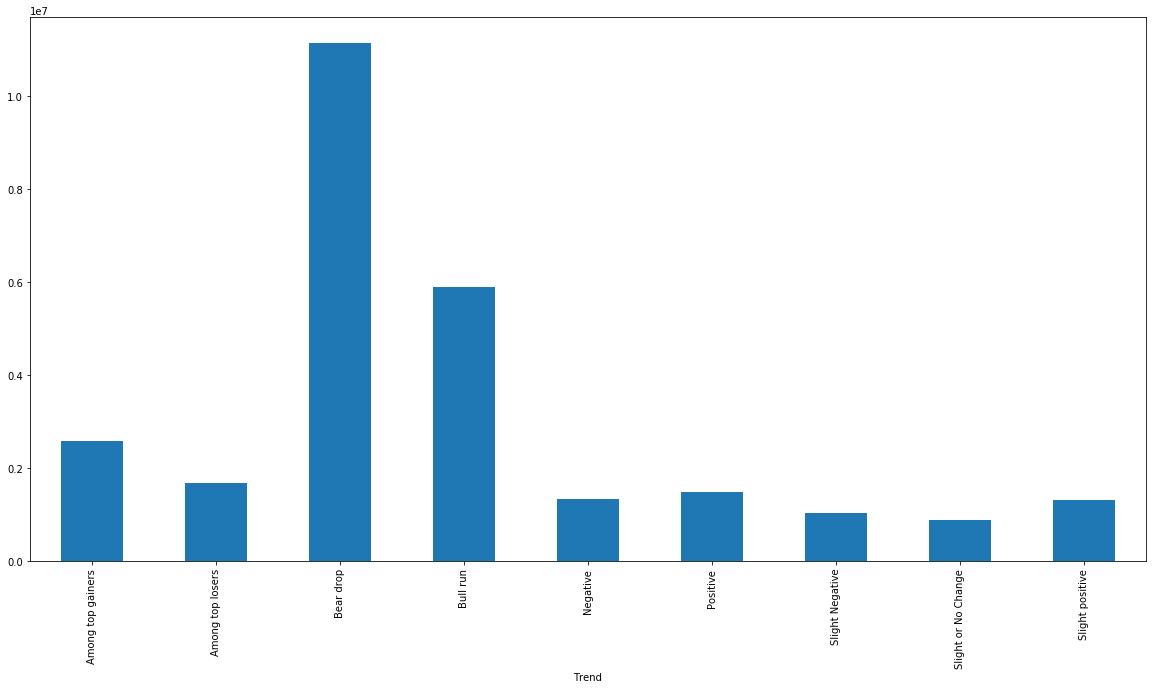

In [37]:
plt.figure(figsize=(20,10))
data.groupby(['Trend'])['Total Traded Quantity'].mean().plot.bar()

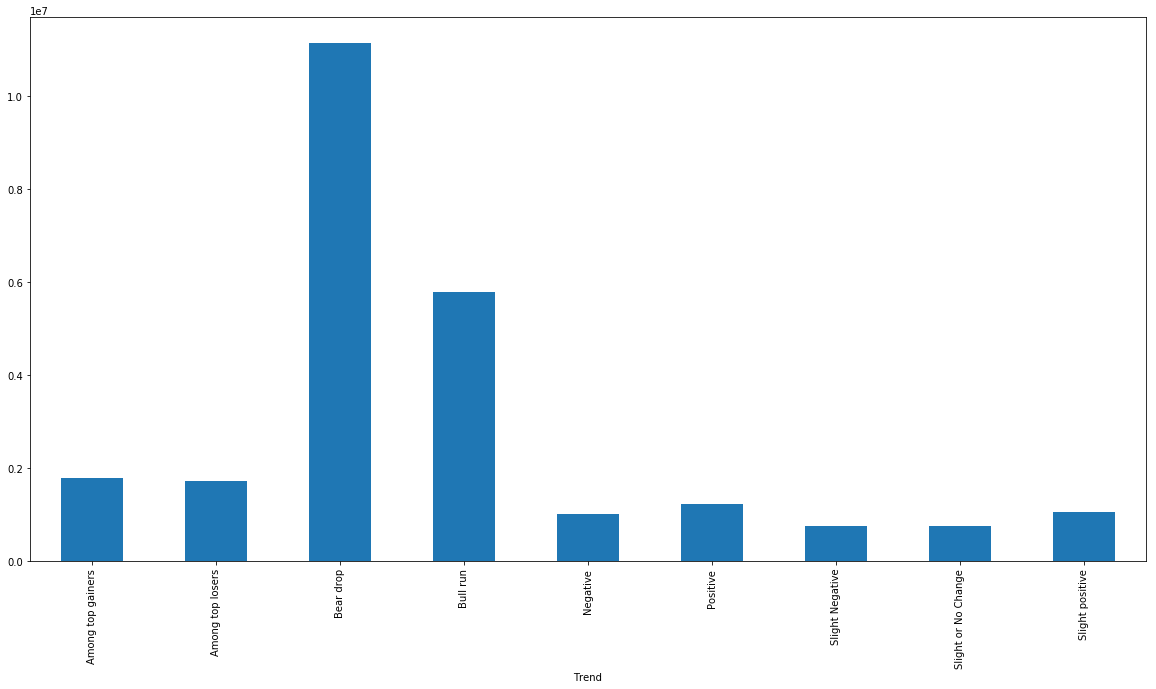

In [38]:
plt.figure(figsize=(20,10))
data.groupby(['Trend'])['Total Traded Quantity'].median().plot.bar()

# Query 2.5 
Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

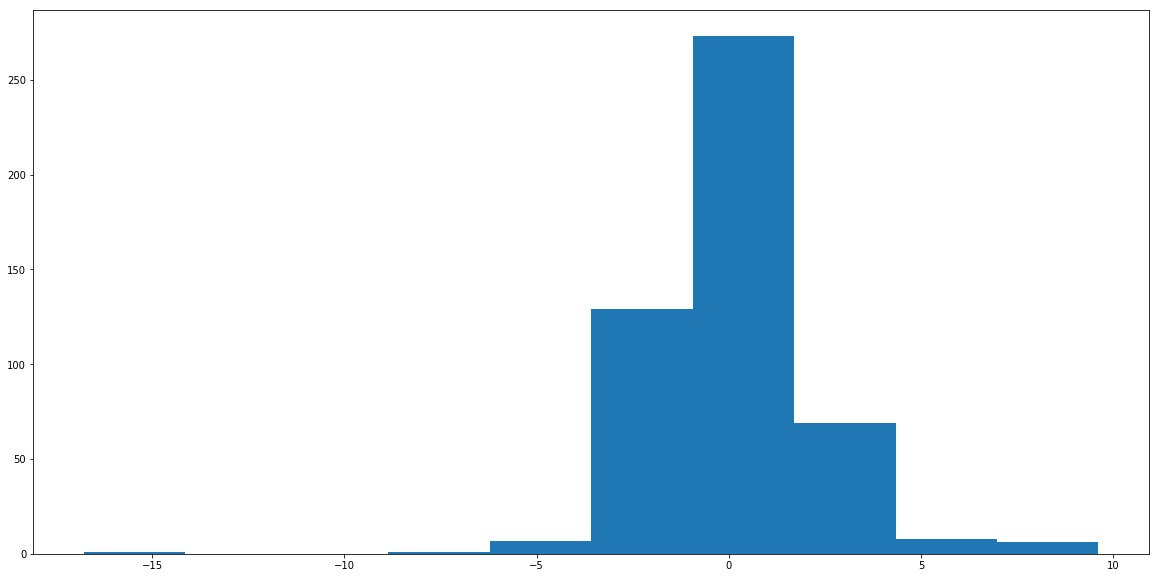

In [39]:
plt.figure(figsize=(20,10))
plt.hist(data['Day_Perc_Change'])
plt.show()

# Query 2.6 
We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price. 

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification. 

In [41]:
import pandas as pd
wipro_data = pd.read_csv('wipro_stock_data.csv')
tcs_data = pd.read_csv('tcs_stock_data.csv')
itc_data = pd.read_csv('itc_stock_data.csv')
cub_data = pd.read_csv('cub_stock_data.csv')
airtel_data = pd.read_csv('airtel_stock_data.csv')


In [42]:
filter_wipro = wipro_data[wipro_data.Series == 'EQ']
filter_tcs = tcs_data[tcs_data.Series == 'EQ']
filter_itc = itc_data[itc_data.Series == 'EQ']
filter_cub = cub_data[cub_data.Series == 'EQ']
filter_airtel = airtel_data[airtel_data.Series == 'EQ']

In [43]:
import pandas as pd

columns = ['Wipro','TCS','ITC','CUB','Airtel']
close_prices_dataFrame = pd.DataFrame(columns = columns)
close_prices_dataFrame['Wipro'] = filter_wipro['Close Price']
close_prices_dataFrame['TCS'] = filter_tcs['Close Price']
close_prices_dataFrame['ITC'] = filter_itc['Close Price']
close_prices_dataFrame['CUB'] = filter_cub['Close Price']
close_prices_dataFrame['Airtel'] = filter_airtel['Close Price']
close_prices_dataFrame.dropna()

,Wipro,TCS,ITC,CUB,Airtel
0,257.75,2347.55,337.10,180.00,381.30
1,257.70,2331.95,334.30,181.55,385.90
2,268.25,2434.95,333.30,184.80,405.70
3,263.20,2475.80,330.40,183.50,395.45
4,263.80,2439.45,328.85,183.05,397.10
5,264.05,2446.40,338.75,174.15,403.15
6,259.85,2397.45,337.15,172.45,407.00
7,266.85,2395.45,325.15,169.60,408.45
8,269.00,2408.35,284.55,166.70,408.30
9,271.10,2449.60,291.45,164.05,421.25


In [44]:
pct_change_dataFrame = close_prices_dataFrame.pct_change().fillna(0)
pct_change_dataFrame.dropna()

,Wipro,TCS,ITC,CUB,Airtel
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.000194,-0.006645,-0.008306,0.008611,0.012064
2,0.040939,0.044169,-0.002991,0.017901,0.051309
3,-0.018826,0.016777,-0.008701,-0.007035,-0.025265
4,0.002280,-0.014682,-0.004691,-0.002452,0.004172
5,0.000948,0.002849,0.030105,-0.048621,0.015235
6,-0.015906,-0.020009,-0.004723,-0.009762,0.009550
7,0.026939,-0.000834,-0.035592,-0.016527,0.003563
8,0.008057,0.005385,-0.124865,-0.017099,-0.000367
9,0.007807,0.017128,0.024249,-0.015897,0.031717


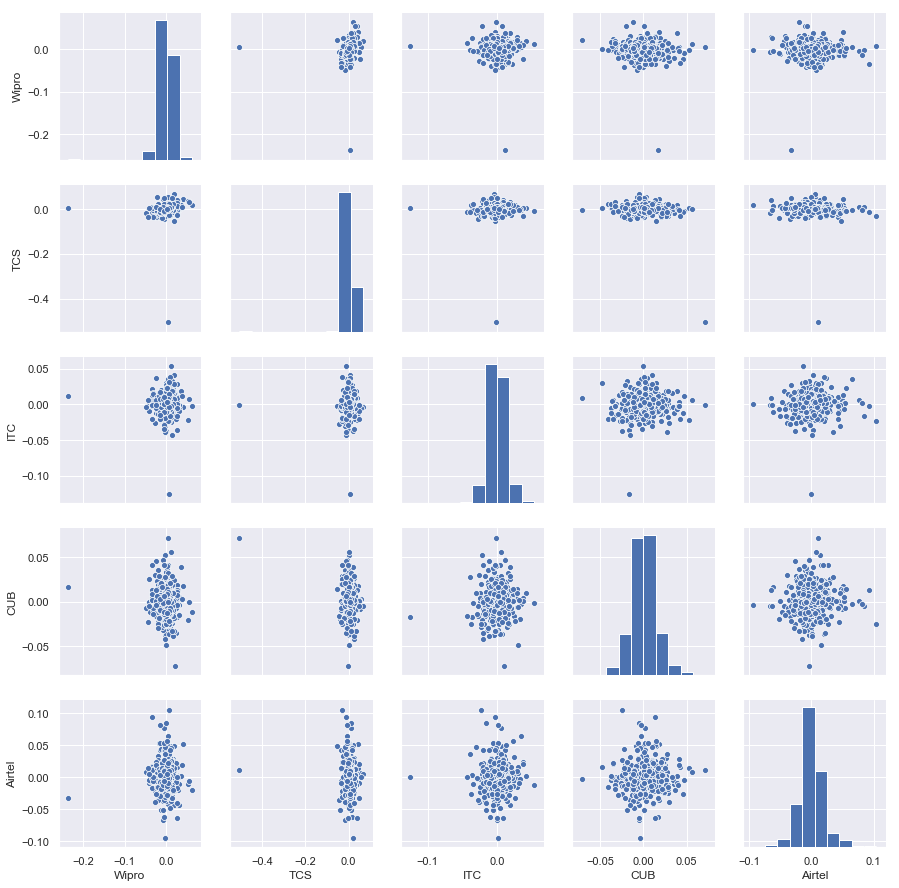

In [45]:
import seaborn as sns

sns.set(color_codes=True)
sns.pairplot(pct_change_dataFrame)


# Query 2.7 
Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read.
You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.
Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

In [51]:
import matplotlib.pyplot as plt
rolling_avg_airtel = pct_change_dataFrame['Airtel'].rolling(7).mean()
rolling_avg_airtel

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6      0.009581
7      0.010090
8      0.008314
9      0.005515
10     0.008633
11     0.005144
12     0.006007
13     0.007278
14     0.006252
15     0.002885
16    -0.002590
17    -0.000145
18     0.002100
19    -0.001351
20    -0.001118
21    -0.001712
22     0.000536
23     0.001600
24    -0.000951
25    -0.000303
26     0.000176
27    -0.003276
28    -0.004232
29    -0.003341
         ...   
465    0.003291
466    0.007637
467    0.001146
468    0.009488
469    0.010601
470    0.007579
471   -0.000299
472    0.007001
473    0.005923
474    0.005985
475   -0.000229
476    0.001835
477    0.004762
478    0.010113
479    0.006703
480    0.004520
481    0.004431
482    0.000468
483   -0.003860
484   -0.004715
485   -0.008931
486   -0.005732
487   -0.006362
488   -0.007350
489   -0.001797
490    0.000714
491    0.001518
492    0.002375
493    0.000017
494    0.004054
Name: Airtel, Length: 49

In [52]:
stand_airtel = rolling_avg_airtel.fillna(0).std()
stand_airtel

0.00808505905324427

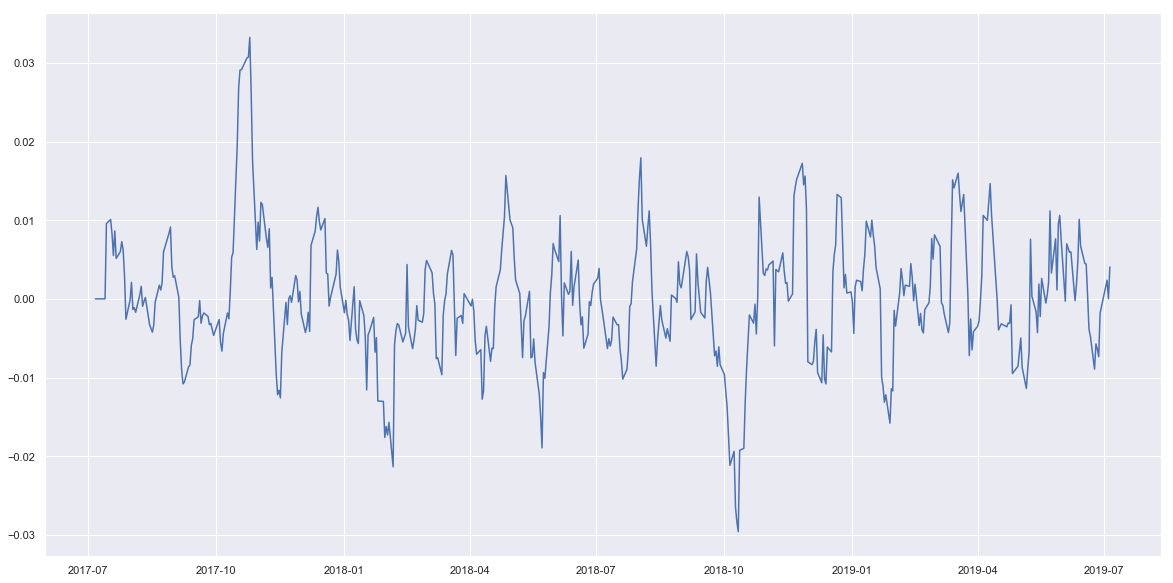

In [53]:
import pandas as pd
crrDate = pd.to_datetime(filter_airtel['Date'])
crrLis = crrDate.tolist()
plt.figure(figsize=(20,10))
plt.plot(crrLis,rolling_avg_airtel.fillna(0).tolist())
plt.show()

# Query 2.8 
Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3) 

In [49]:
nif_load = pd.read_csv('NIFTY50_data.csv')
nif_load

,Date,Open,High,Low,Close
0,05 Jul 2019,11964.75,11981.75,11797.90,11811.15
1,04 Jul 2019,11928.80,11969.25,11923.65,11946.75
2,03 Jul 2019,11932.15,11945.20,11887.05,11916.75
3,02 Jul 2019,11890.30,11917.45,11814.70,11910.30
4,01 Jul 2019,11839.90,11884.65,11830.80,11865.60
5,28 Jun 2019,11861.15,11871.70,11775.50,11788.85
6,27 Jun 2019,11860.85,11911.15,11821.05,11841.55
7,26 Jun 2019,11768.15,11871.85,11757.55,11847.55
8,25 Jun 2019,11681.00,11814.40,11651.00,11796.45
9,24 Jun 2019,11725.80,11754.00,11670.20,11699.65


<Figure size 1440x720 with 0 Axes>

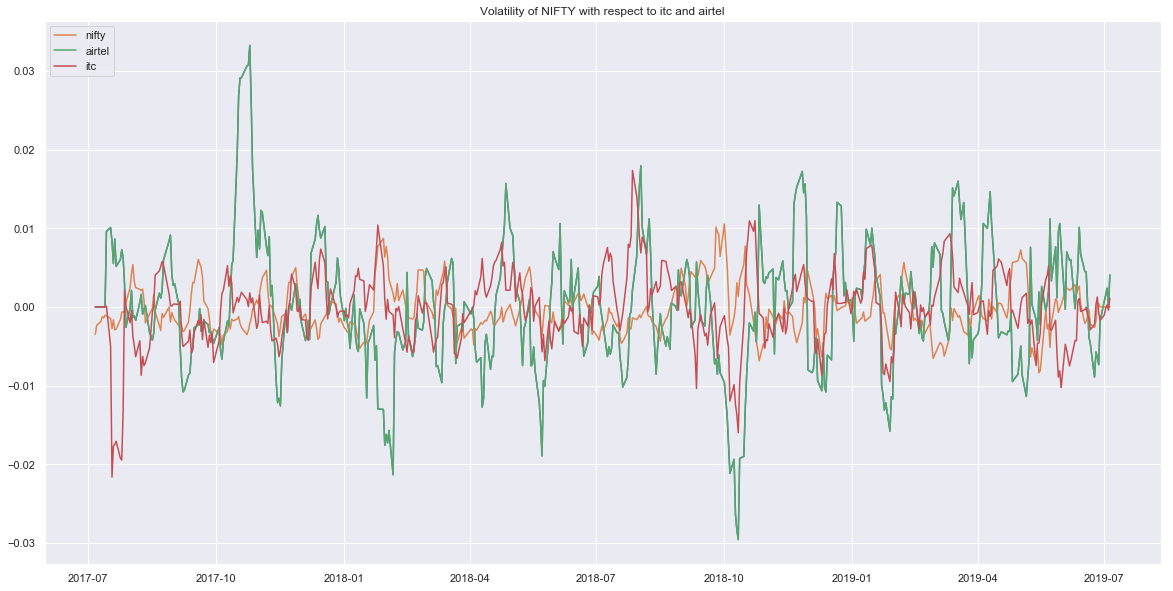

In [54]:
nif_close_price = nif_load['Close']
nif_change = nif_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
nifDate = pd.to_datetime(nif_load['Date'])
nifDate = nifDate.tolist()
plt.figure(figsize=(20,10))

itc_Date = pd.to_datetime(filter_itc['Date'])
itcLis = itc_Date.tolist()
itc_close_price = filter_itc['Close Price']
itc_change = itc_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
plt.figure(figsize=(20,10))
plt.plot(itcLis,rolling_avg_airtel.fillna(0).tolist())

plt.title("Volatility of NIFTY with respect to itc and airtel")
plt.plot(nifDate,nif_change.tolist(),label = 'nifty')
plt.plot(crrLis,rolling_avg_airtel.fillna(0).tolist(),label = 'airtel')
plt.plot(tcsLis,itc_change,label = 'itc')
plt.legend(loc='upper left')
plt.show()

# Query 2.9 
Trade Calls - Using Simple Moving Averages. Study about moving averages here.Plot the 21 day and 34 day Moving average with the average price and decide a Call ! 
Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. 
One of the most widely used technical indicators.

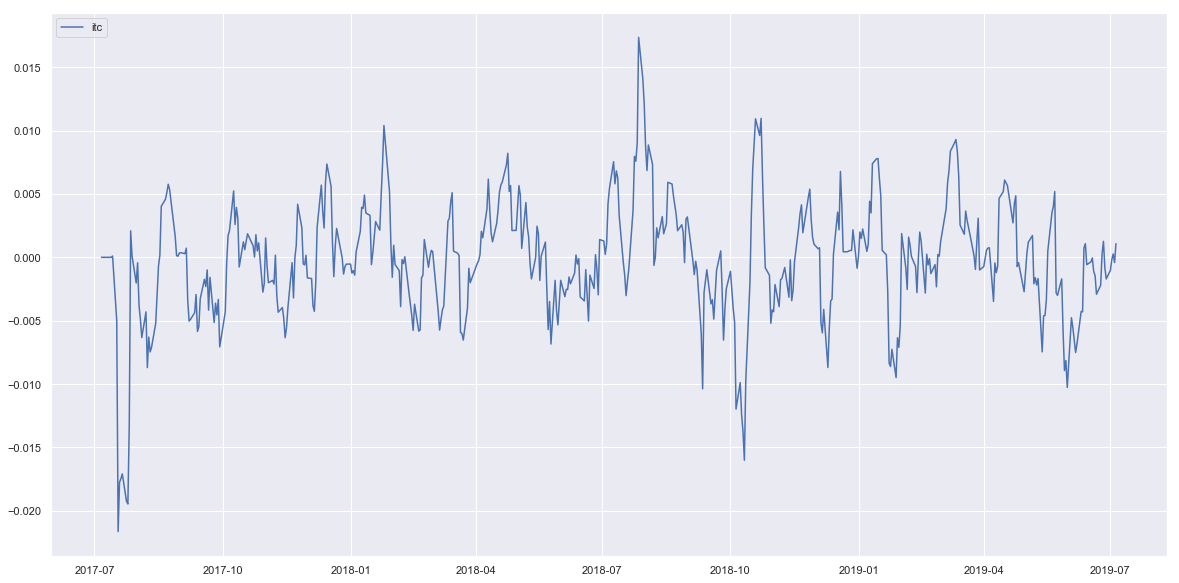

In [55]:
plt.figure(figsize=(20,10))
plt.plot(itcLis,itc_change,label = 'itc')
plt.legend(loc='upper left')
plt.show()

In [57]:
import numpy as np
#making short and long signals
short_window = 21
long_window = 34

signals = pd.DataFrame(index=filter_itc.index)
signals['signal'] = 0.0

#SMA of Short Window
signals['short_mavg'] = filter_itc['Close Price'].rolling(window=short_window, min_periods=1,center=False).mean()

#SMA of Long Window
signals['long_mavg'] = filter_itc['Close Price'].rolling(window=long_window,min_periods=1, center=False).mean()

#Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0,0.0)

#Generate trading orders
signals['positions'] = signals['signal'].diff()
print(signals)

     signal  short_mavg   long_mavg  positions
0       0.0  337.100000  337.100000        NaN
1       0.0  335.700000  335.700000        0.0
2       0.0  334.900000  334.900000        0.0
3       0.0  333.775000  333.775000        0.0
4       0.0  332.790000  332.790000        0.0
5       0.0  333.783333  333.783333        0.0
6       0.0  334.264286  334.264286        0.0
7       0.0  333.125000  333.125000        0.0
8       0.0  327.727778  327.727778        0.0
9       0.0  324.100000  324.100000        0.0
10      0.0  320.954545  320.954545        0.0
11      0.0  318.283333  318.283333        0.0
12      0.0  316.357692  316.357692        0.0
13      0.0  314.575000  314.575000        0.0
14      0.0  313.180000  313.180000        0.0
15      0.0  311.640625  311.640625        0.0
16      0.0  310.458824  310.458824        0.0
17      0.0  309.058333  309.058333        0.0
18      0.0  307.942105  307.942105        0.0
19      0.0  306.817500  306.817500        0.0
20      0.0  

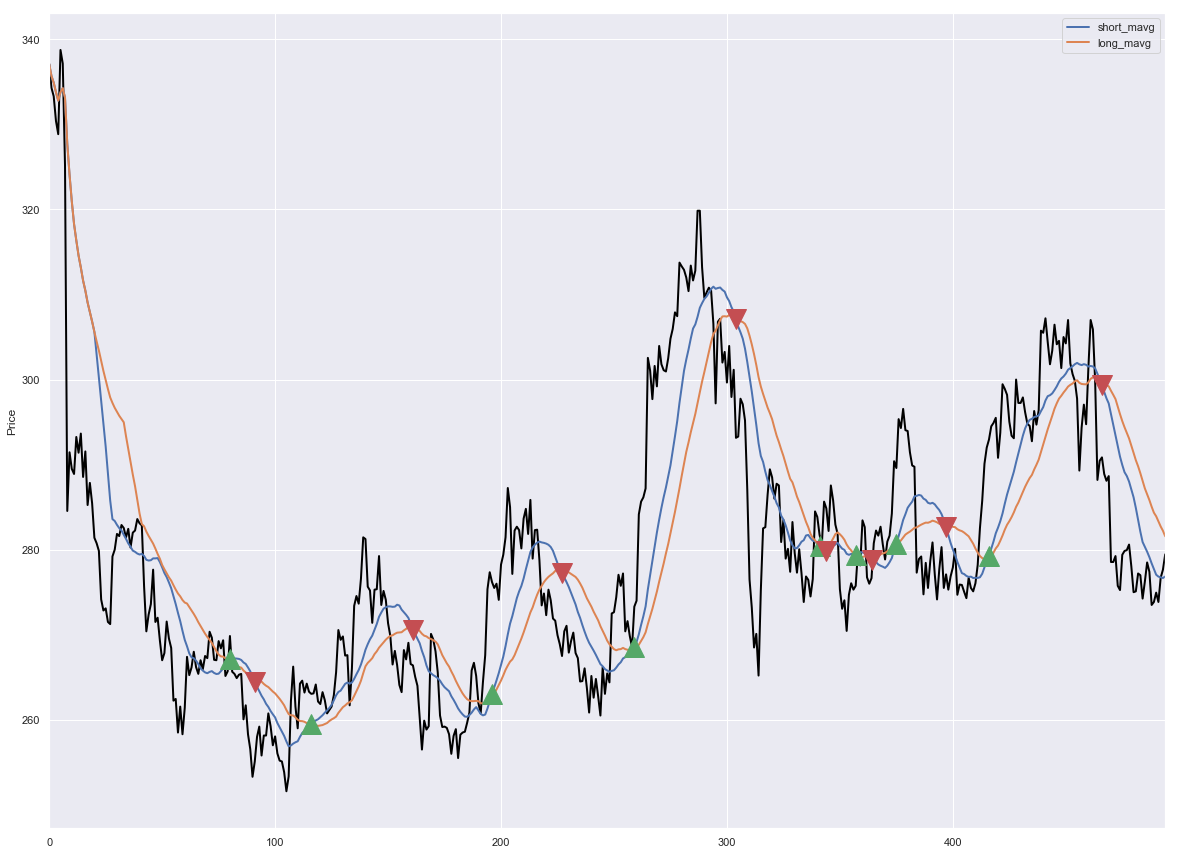

In [59]:
# Initialize the plot figure
fig = plt.figure(figsize=(20,15))

#Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel='Price')

#Plot the closing price
filter_itc['Close Price'].plot(ax=ax1, color='black', lw=2.)

#plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

#Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^' , markersize=20,color='g')

#Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v' , markersize=20,color='r')

plt.show()

# 2.10 Trade Calls - Using Bollinger Bands 
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average 
The bollinger bands comprise the following data points- 
The 14 day rolling mean of the closing price (we call it the average) 
Upper band which is the rolling mean + 2 standard deviations away from the average. 
Lower band which is the rolling mean - 2 standard deviations away from the average. 
Average Daily stock price.
Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. 
Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. 
Save to a new csv file. 

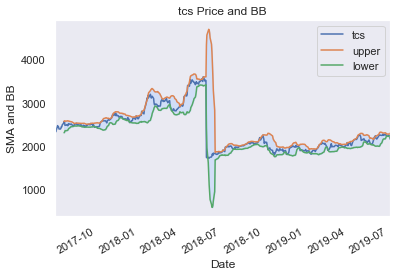

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

symbol = 'tcs'

# read csv file, use date as index and read close as a column
df = pd.read_csv('tcs_stock_data.csv'.format(symbol), index_col='Date',
                 parse_dates=True, usecols=['Date', 'Close Price'],
                 na_values='nan')

# rename the column header with symbol name
df = df.rename(columns={'Close Price': symbol})
df.dropna(inplace=True)

# calculate Simple Moving Average with 14 days window
sma = df.rolling(window=14).mean()

# calculate the standar deviation
rstd = df.rolling(window=14).std()

upper_band = sma + 2 * rstd
upper_band = upper_band.rename(columns={symbol: 'upper'})
lower_band = sma - 2 * rstd
lower_band = lower_band.rename(columns={symbol: 'lower'})
df = df.join(upper_band).join(lower_band)
ax = df.plot(title='{} Price and BB'.format(symbol))
ax.fill_between(df.index, lower_band['lower'], upper_band['upper'], color='#ADCCFF', alpha='0.4')
ax.set_xlabel('Date')
ax.set_ylabel('SMA and BB')
ax.grid()
plt.show()